In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("Marvel Vs DC NEW.csv")
df.head(5)

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1690 non-null   object 
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
 7   CU           1302 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 105.8+ KB


<Axes: xlabel='Genre'>

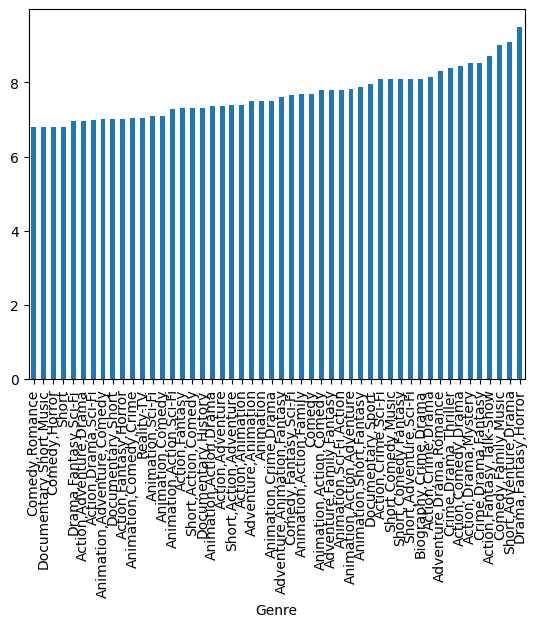

In [11]:
df.groupby('Genre')['IMDB_Score'].mean().sort_values().tail(50).plot(kind='bar')

In [12]:
df['RunTime'].str.split(expand=True)[0]

,0
0,0
1,0
2,50
3,350
4,0
...,...
1685,42
1686,42
1687,42
1688,42


In [13]:
df.columns

Index(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Description', 'IMDB_Score'], dtype='object')

In [14]:
marvel_cont=[
    "Iron Man", "Tony Stark", "Captain America", "Steve Rogers", "Thor", "Hulk",
    "Bruce Banner", "Spider-Man", "Peter Parker", "Black Widow", "Natasha Romanoff",
    "Doctor Strange", "Stephen Strange", "Black Panther", "T'Challa", "Ant-Man",
    "Scott Lang", "Captain Marvel", "Carol Danvers", "Hawkeye", "Clint Barton",
    "Scarlet Witch", "Wanda Maximoff", "Vision", "Loki", "Thanos", "Nick Fury",
    "Star-Lord", "Peter Quill", "Gamora", "Rocket Raccoon", "Groot", "Deadpool",
    "Wolverine", "Logan", "Silver Surfer", "Daredevil", "Matt Murdock", "Winter Soldier",
    "Bucky Barnes", "Avengers", "Hero", "Villain", "Superpower", "Infinity", "Asgard",
    "Shield", "Superhero", "Power", "Universe", "Battle", "Origin", "War", "Quantum",
    "Multiverse", "Technology", "Transformation", "Alliance", "Legacy", "Time",
    "Space", "Justice", "Wakanda", "Stark", "Mutant", "S.H.I.E.L.D.", "Gem", "Crossover",
    "Team", "God", "Cosmic", "Destiny", "Drax", "Jessica Jones", "Luke Cage",
    "X-Men", "Fantastic Four", "Venom", "Ghost Rider", "The Punisher", "The Eternals",
    "Blade", "Hank Pym", "Magneto"
]
DC_cont=[
    "Batman", "Superman", "Justice", "League", "Dark", "Knight", "Wonder Woman",
    "Suicide Squad", "Man of Steel", "Gotham", "Green Lantern", "Flash", "Arrow",
    "Titans", "Shazam", "Aquaman", "Joker", "Birds of Prey", "Vengeance", "Crisis",
    "Return", "Rise", "Legends", "Hero", "Dawn", "Tomorrow", "Gods", "Power",
    "World", "Origin", "Reign", "Son", "War", "Throne", "Watchmen", "Phantom",
    "Enemy", "Universe", "Blood", "Redemption", "Doomsday", "Apocalypse", "End",
    "Constantine", "Catwoman", "Jonah Hex", "Nightwing", "Robin", "Supergirl",
    "Zatanna", "Swamp Thing", "Blue Beetle", "Black Adam", "Vixen", "Harley Quinn",
    "Static Shock", "Hawkman", "Green Arrow", "Batgirl", "Superboy", "Darkseid",
    "Deathstroke", "Lobo", "Spectre", "The Question", "Red Hood", "Lucifer",
    "Steel", "Raven", "Huntress", "Booster Gold", "Mr. Terrific", "Black Canary",
    "The Atom", "Martian Manhunter", "Dr. Fate", "Black Lightning", "Firestorm",
    "Etrigan", "The Demon", "Orion", "Metamorpho", "Azrael", "Deadshot",
    "Solomon Grundy", "Doctor Manhattan"
]
def findCU(tittle):
  for keyword in marvel_cont:
    if keyword in tittle:
      return 'Marvel'
  for keyword in DC_cont:
    if keyword in tittle:
      return 'DC'
df['CU']=df['Description'].apply(findCU)
df['CU']=df['Movie'].apply(findCU)

df.head(5)

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score,CU
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0,None
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0,Marvel
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1,Marvel
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0,Marvel


In [45]:
df['CU'].astype(str)
df['CU'].fillna('Disney',inplace=True)
df[df['CU'].isnull()]

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score,CU


<Axes: xlabel='CU'>

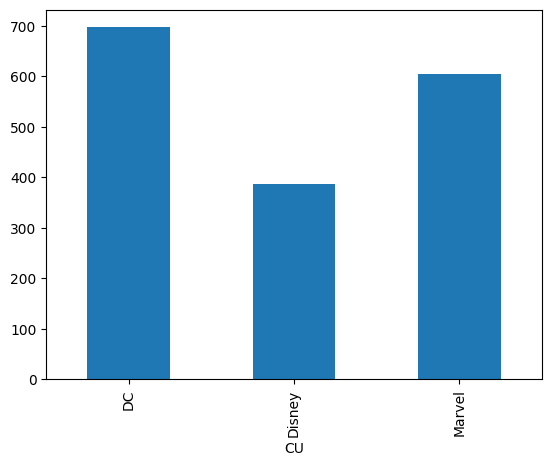

In [51]:
df.groupby('CU').size().plot(kind='bar')

In [46]:
df[df['CU'] == 'Disney']

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score,CU
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0,Disney
7,7,Guardians of the Galaxy,-2014,"Action,Adventure,Comedy",121 min,A group of intergalactic criminals must pull t...,8.0,Disney
14,14,Shang-Chi and the Legend of the Ten Rings,-2021,"Action,Adventure,Fantasy",0,"The movie, based on Marvel Comics, will focus ...",0.0,Disney
18,18,Guardians of the Galaxy Vol. 2,-2017,"Action,Adventure,Comedy",136 min,The Guardians struggle to keep together as a t...,7.6,Disney
24,24,Brightburn,-2019,"Drama,Horror,Mystery",90 min,What if a child from another world crash-lande...,6.1,Disney
...,...,...,...,...,...,...,...,...
1616,1616,Doom Patrol,(2019– ),"Action,Adventure,Comedy",45 min,Silas and the team break into the Ant Farm to ...,8.9,Disney
1617,1617,Doom Patrol,(2019– ),"Action,Adventure,Comedy",51 min,Vic and Rita face a dangerous man known as the...,8.1,Disney
1618,1618,Doom Patrol,(2019– ),"Action,Adventure,Comedy",51 min,Rita tries to soothe Victor during a difficult...,8.8,Disney
1620,1620,Krypton,(2018–2019),"Action,Adventure,Drama",42 min,"Seg-El is stranded far from home, where his gr...",7.8,Disney


<Axes: xlabel='IMDB_Score'>

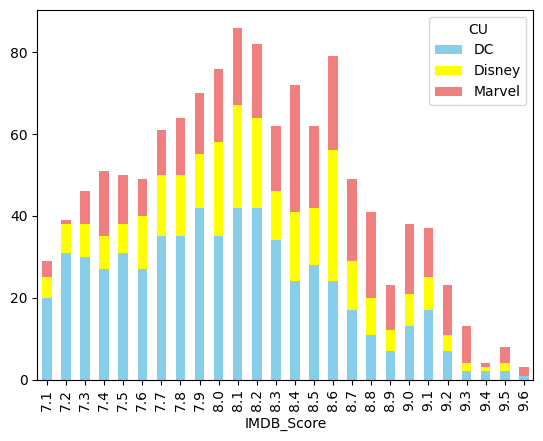

In [73]:
data=df[df['IMDB_Score']>7 ]
# data=df[df['IMDB_Score']>7 & df['Year'] > 2000 ]
# data.groupby('IMDB_Score').size().plot(kind='bar', hue='CU')
data.groupby(['IMDB_Score', 'CU']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'yellow','lightcoral'])


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1690 non-null   object 
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
 7   CU           1690 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 105.8+ KB


<Axes: xlabel='Year'>

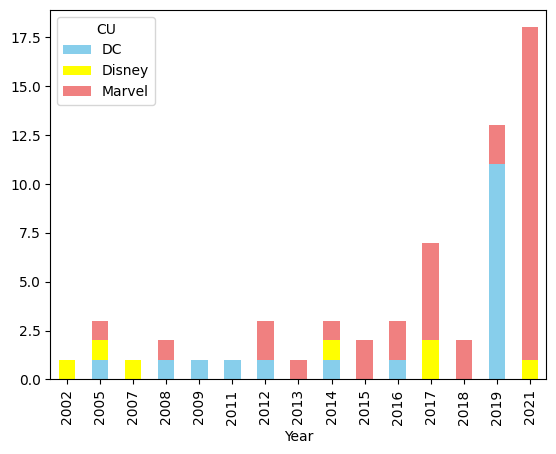

In [92]:
# # df['Year'].replace('',['(',')','-'])
# df['Year'] = df['Year'].str.replace(r'[\(\)\-]', '', regex=True)
# df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
# Convert 'Year' to string type before applying string operations
df['Year'] = df['Year'].astype(str)

# Replace unwanted characters like '(', ')', and '-' with an empty string
df['Year'] = df['Year'].str.replace(r'[\(\)\-]', '', regex=True)

# Convert 'Year' back to numeric values, coercing errors into NaN, and then to integers
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

data=df[(df['IMDB_Score'] > 7) & (df['Year'] > 2000) ]
data.groupby(['Year', 'CU']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'yellow','lightcoral'])
